# Exploratory Data Analysis

## 1) First do Data Featuring Part - Go and handle the missing values <br>
## 2) Must expertis on Numpy, Seaborn, Pandas & Matplotlib  <br>
## 3) How to handle categorical data
## 4) Feature Selection

# EDA with Python and applying Logistic Regression 

For this lecture we will be working with the "Titanic data set from kaggle". This is a very famous data set and very often is a student's first step in machine learning

We will be trying to predict a classification - survival or deceased. Let's begin our understanding of implementing Logistic Regression in python for classification.

We will use a semi-cleaned version of the titanic data set, if you use the dataset hosted directly on kaggle, you may need to do some additional cleaning. Not show in this lecture

## Important Libraries 

Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\dell\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [5]:
import matplotlib; print(matplotlib.__version__)
print(matplotlib.get_backend())

3.5.3
module://matplotlib_inline.backend_inline


In [2]:
df = pd.read_csv('titanic_train.csv')


In [3]:
df.head()
df.shape[0]

891

## Missing Data Information & Give visualization to dataset

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

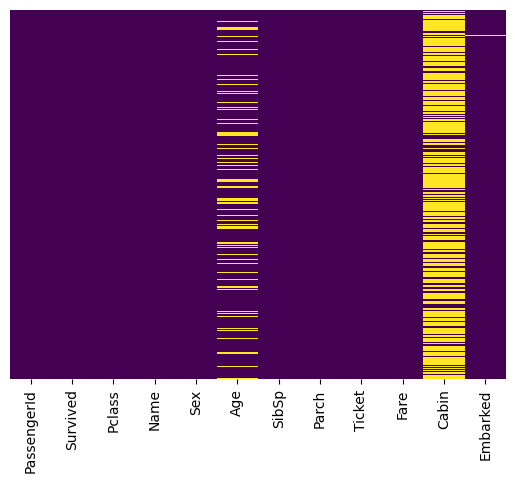

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.


<AxesSubplot:xlabel='Age', ylabel='Density'>

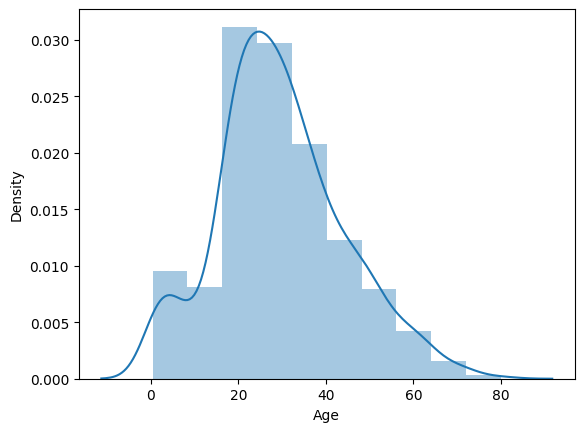

In [9]:
# plt.hist(df['Age'])
# sns.distplo
# plt.show()
sns.distplot(df['Age'],bins=10,hist=True,kde=True)

In [11]:
df.loc[df['Age'].isnull()].count()['PassengerId']

177

### Univariate Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

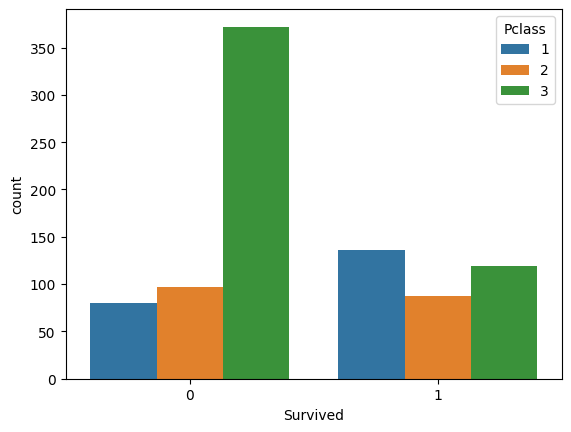

In [14]:
sns.countplot(x='Survived',data=df,hue='Pclass')

<AxesSubplot:ylabel='Sex'>

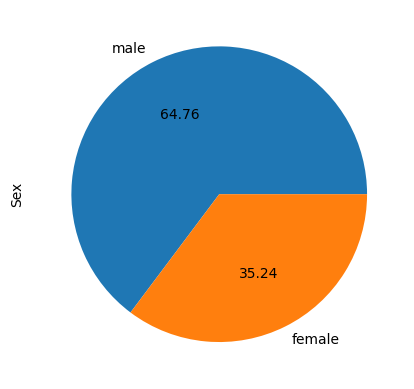

In [16]:
df['Sex'].value_counts().plot(kind='pie',autopct = '%.2f')

### Numerical Data 

### a. Histogram 

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Age', ylabel='Density'>

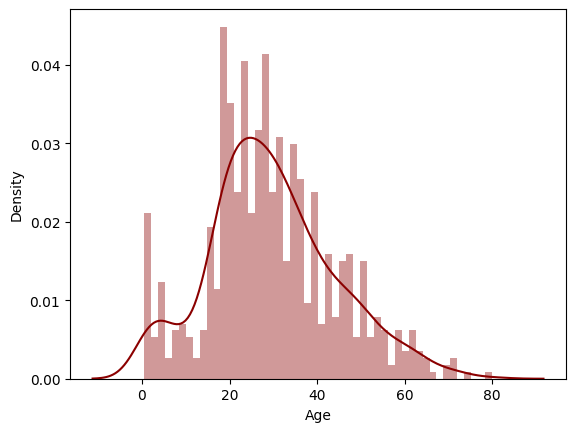

In [17]:
sns.distplot(df['Age'],bins=50,kde=True,color='darkred')

### b. Boxplot

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

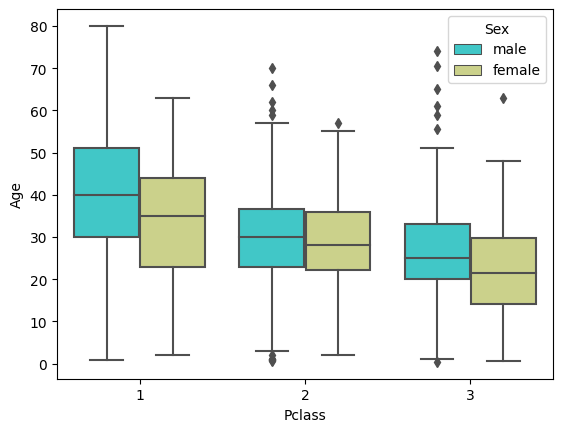

In [18]:
sns.boxplot(x='Pclass',y='Age',data=df,palette='rainbow',hue='Sex')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

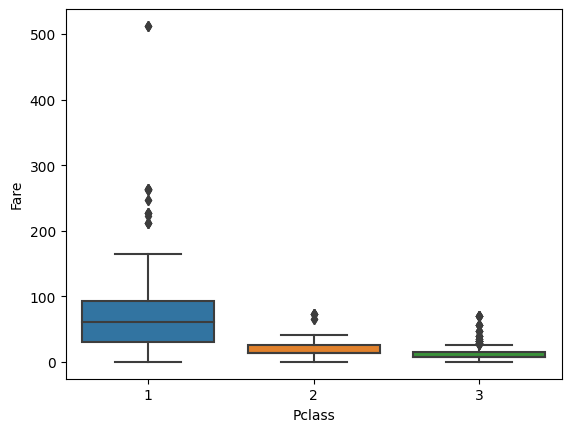

In [20]:
sns.boxplot(x='Pclass',y='Fare',data=df)

In [42]:
df['Age'].skew()
# This shows that data is little bit right skewed

0.38910778230082704

In [23]:
tips = sns.load_dataset('tips')
titanic = pd.read_csv('titanic_train.csv')
flights = sns.load_dataset('flights')
iris = sns.load_dataset('iris')

### Bivariate Analysis 

### 1. Scatterplot (Numerical-Numerical) 

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

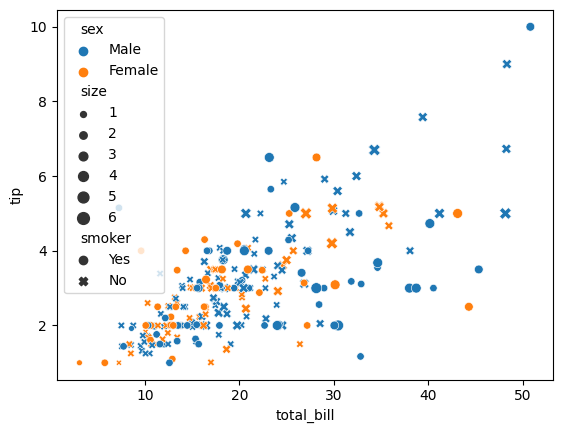

In [24]:
sns.scatterplot(data=tips,x='total_bill',y='tip',hue='sex',style='smoker',size='size') 
#If we add hue parameter, then it is
#Multivariate Analysis

### 2. Barplot (Numerical - Categorical) 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

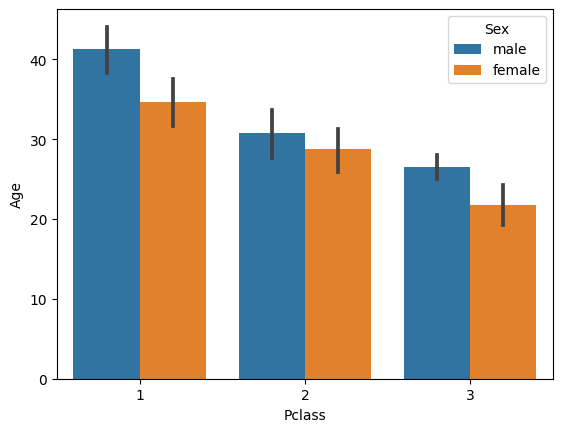

In [25]:
sns.barplot(data=titanic,x='Pclass',y='Age',hue='Sex')

### 3. Box Plot (Numerical - Categorical) 

<AxesSubplot:xlabel='Sex', ylabel='Age'>

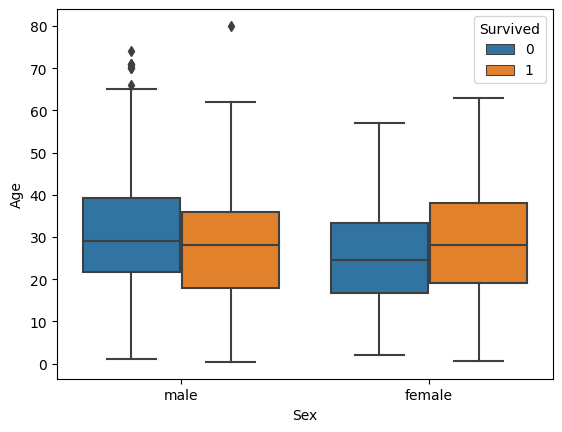

In [26]:
sns.boxplot(data=titanic,x='Sex',y='Age',hue='Survived')

### 4. Distplot(Numerical - Categorical)

In [27]:
titanic[titanic['Survived']==0]['Age']

0      22.0
4      35.0
5       NaN
6      54.0
7       2.0
       ... 
884    25.0
885    39.0
886    27.0
888     NaN
890    32.0
Name: Age, Length: 549, dtype: float64

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='Age', ylabel='Density'>

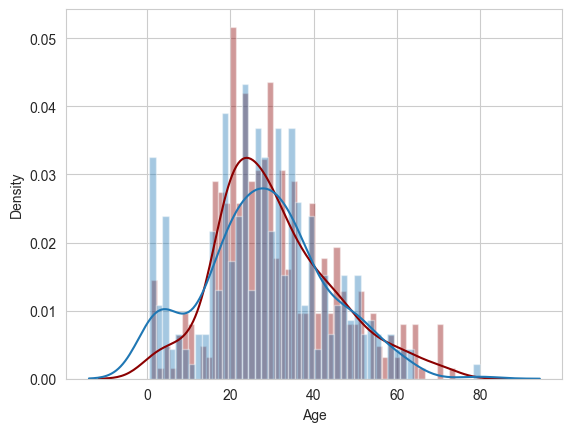

In [70]:
sns.distplot(titanic[titanic['Survived']==0]['Age'],bins=50,kde=True,color='darkred')
sns.distplot(titanic[titanic['Survived']==1]['Age'],bins=50,kde=True)

#### Above chart shows that at very young age like 0-10 years, probability of living is greater than probability of dying 

### 5. HeatMap (Categorical - Categorical) 

In [28]:
pd.crosstab(titanic['Pclass'],titanic['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

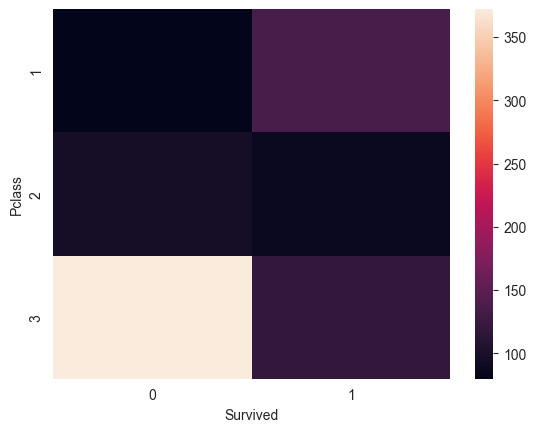

In [74]:
sns.heatmap(pd.crosstab(titanic['Pclass'],titanic['Survived']))

In [80]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<AxesSubplot:xlabel='year', ylabel='passengers'>

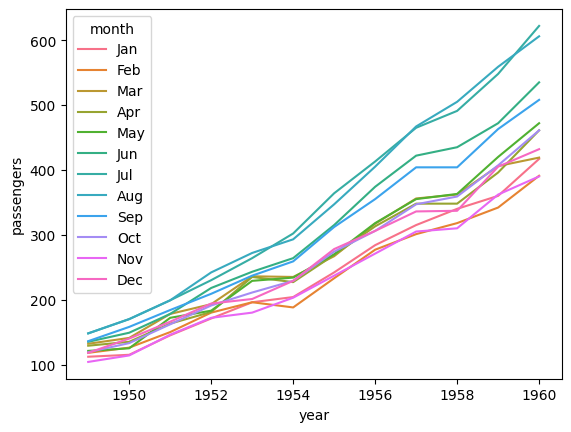

In [29]:
sns.lineplot(data=flights,y='passengers',x='year',hue='month')

In [30]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


# Pandas Profiling to see the detailed EDA Summary 

In [31]:
!pip install pandas_profiling

In [32]:
pip install -U pip setuptools wheel
pip install -U spacy
python -m spacy download en_core_web_sm

SyntaxError: invalid syntax (2119417417.py, line 1)

In [ ]:
import pandas_profiling

In [ ]:
!pip uninstall markupsafe
!pip install markupsafe==2.0.1

In [ ]:
import seaborn as sns
import pandas as pd
tips = sns.load_dataset('tips')
titanic = pd.read_csv('titanic_train.csv')
flights = sns.load_dataset('flights')
iris = sns.load_dataset('iris')

In [ ]:
import pandas_profiling as pp
#df = pd.read_excel("WBNAME", sheetname = None)
profile= pp.ProfileReport(titanic)
profile.to_file('pandas_profile_test.html')

<AxesSubplot:xlabel='Survived', ylabel='count'>

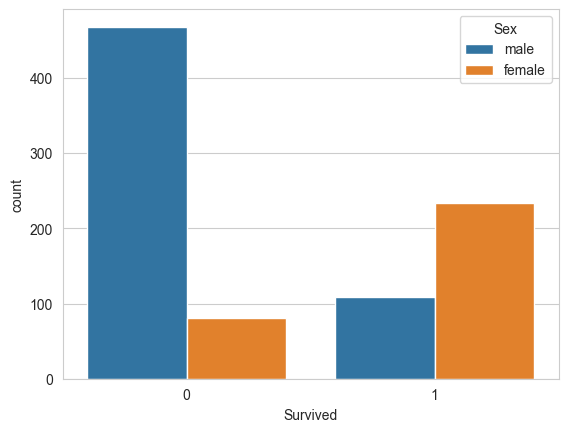

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,hue='Sex')

#Visualizing how many survivied in Titanic accident. 0 - NOt survivied,1 - Survived

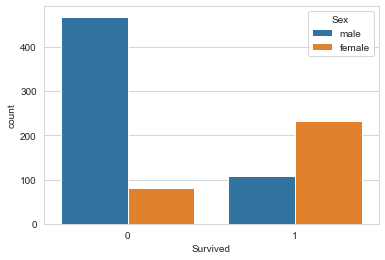

In [54]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,hue='Sex')

#Visualizing how many survivied in Titanic accident. 0 - NOt survivied,1 - Survived (Differenciated with Sex category)

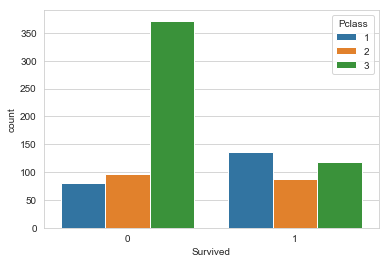

In [37]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,hue='Pclass')

#Visualizing how many survivied in Titanic accident. 0-NOt survivied,1-Survived (Differenciated with Passenger class category)
#Seems more passengers died from 1st class.

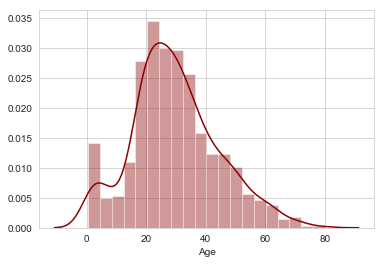

In [38]:
sns.distplot(df['Age'].dropna(),kde=True,color='darkred')

#Seems people who died are between age 20-35

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

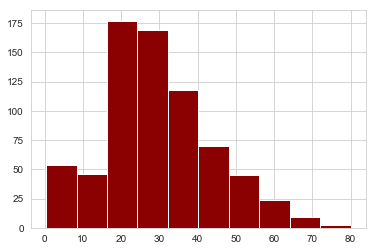

In [39]:
plt.hist(df['Age'],color='darkred')

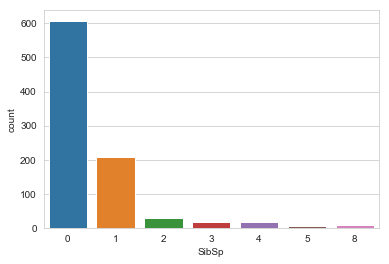

In [40]:
sns.countplot(x='SibSp',data=df)

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


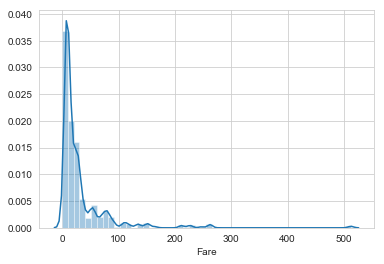

In [42]:
sns.distplot(df['Fare'])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

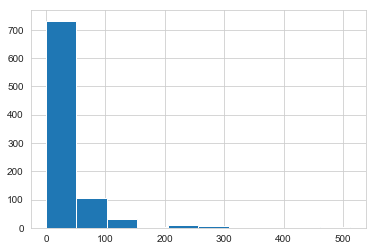

In [43]:
plt.hist(df['Fare'])

# Data Cleansing

We want to fill in missing aga data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the avergage age by passenger class. For example

In [44]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


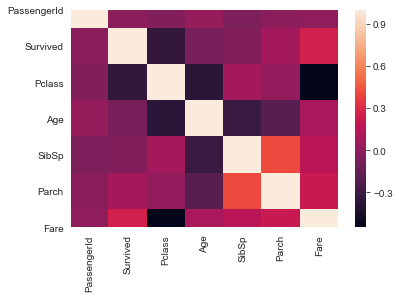

In [84]:
sns.heatmap(df.corr())

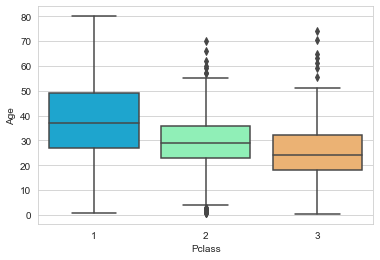

In [82]:
sns.boxplot(x='Pclass',y='Age',data=df,palette='rainbow')

We can see Age of class1 passengers are high followed by class2 & class3 Passengers. This means wealthier passenger are of more Age.... And poorer passengers are of younger age.

In [87]:
df.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [45]:
df.loc[(df['Pclass']==1) & (df['Age'].isnull()) ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,A32,S
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C
270,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S
295,296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C


In [46]:
a = df.loc[df['Pclass']==1].mean()["Age"]
b = df.loc[df['Pclass']==2].mean()["Age"]
c = df.loc[df['Pclass']==3].mean()["Age"]
print(a)
print(b)
print(c)

38.233440860215055
29.87763005780347
25.14061971830986


C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
df.loc[(df['Pclass']==1) & (df['Age'].isnull()),'Age'] = a

In [48]:
df.loc[(df['Pclass']==1) & (df['Age']==a)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,38.233441,1,0,PC 17569,146.5208,B78,C
55,56,1,1,"Woolner, Mr. Hugh",male,38.233441,0,0,19947,35.5000,C52,S
64,65,0,1,"Stewart, Mr. Albert A",male,38.233441,0,0,PC 17605,27.7208,NaN,C
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,38.233441,0,1,113505,55.0000,E33,S
168,169,0,1,"Baumann, Mr. John D",male,38.233441,0,0,PC 17318,25.9250,NaN,S
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,38.233441,0,0,113767,50.0000,A32,S
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,38.233441,0,0,PC 17585,79.2000,NaN,C
270,271,0,1,"Cairns, Mr. Alexander",male,38.233441,0,0,113798,31.0000,NaN,S
284,285,0,1,"Smith, Mr. Richard William",male,38.233441,0,0,113056,26.0000,A19,S
295,296,0,1,"Lewy, Mr. Ervin G",male,38.233441,0,0,PC 17612,27.7208,NaN,C


In [50]:
df.loc[(df['Pclass']==2) & (df['Age'].isnull()),'Age'] = b

In [51]:
df.loc[(df['Pclass']==3) & (df['Age'].isnull()),'Age'] = c

In [52]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
#Other way to impute data as follows
def impute_age(cols):
    Age= cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return a
        if Pclass==2:
            return b
        if Pclass==3:
            return c
    else:
        return Age
    
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [56]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

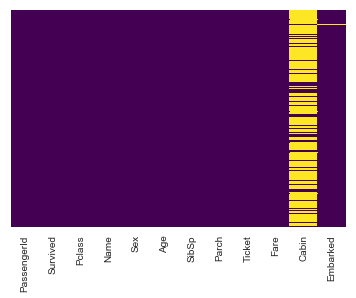

In [57]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Droping Cabin & Embarked column - As there are so much Nan values 

In [58]:
df.drop('Cabin',axis=1,inplace=True)  #Removing Cabin column from the dataset

In [70]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [71]:
df.dropna(how='any',axis=0,inplace=True)

In [72]:
df.shape

(889, 11)

# Converting Categorical Features 

We will need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [74]:
df['Embarked'].value_counts()   #We will change two categorical column into ordenal form

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [75]:
pd.get_dummies(df['Embarked'],drop_first=False).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [76]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C


In [77]:
sex = pd.get_dummies(df['Sex'],drop_first=False)
embarked = pd.get_dummies(df['Embarked'],drop_first=False)

In [78]:
embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [79]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.00000,1,0,7.2500
1,2,1,1,38.00000,1,0,71.2833
2,3,1,3,26.00000,0,0,7.9250
3,4,1,1,35.00000,1,0,53.1000
4,5,0,3,35.00000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.00000,0,0,13.0000
887,888,1,1,19.00000,0,0,30.0000
888,889,0,3,25.14062,1,2,23.4500
889,890,1,1,26.00000,0,0,30.0000


In [80]:
df=pd.concat([df,sex,embarked],axis=1)

In [81]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1
